# Data Science project

## Building a predictive model in python

using the iris data 

Setting up:
- Import necessary libraries
- Load in our data from the csv file 'iris.csv'

In [174]:
%matplotlib inline

In [175]:
#Import libraries and check versions

import sys
import matplotlib.pyplot 
import scipy 
import numpy 
import pandas 
import sklearn 

print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))


scipy: 0.19.1
numpy: 1.13.3
matplotlib: 2.1.0
pandas: 0.20.3
sklearn: 0.19.1


In [176]:
# Load libraries

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier

In [177]:
#Load dataset
iris = "C:\\Users\\Casey\\Desktop\\DS projects\\iris\\iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(iris, names=names, header=0)

Exploring the data for the first time

In [178]:
#Shape
print(dataset.shape)

(150, 5)


In [179]:
#First ten rows
print(dataset.head(10))

   sepal-length  sepal-width  petal-length  petal-width   class
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


In [180]:
#Summary statistics
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [181]:
#Class distribution
print(dataset.groupby('class').size())

class
setosa        50
versicolor    50
virginica     50
dtype: int64


## Data visualization

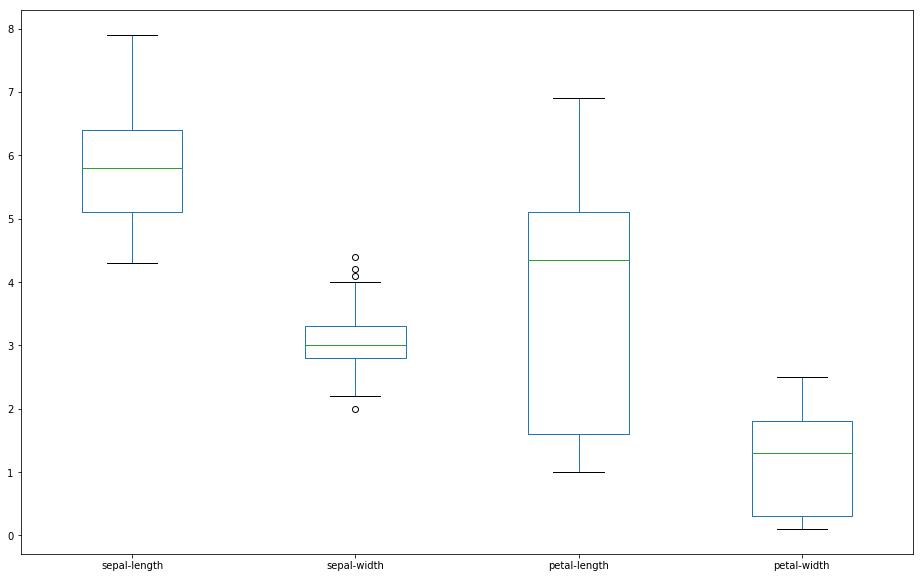

In [182]:
#Univariat plots
#Box and whisker plots of each variable, seein they are numeric
dataset.plot(kind='box', figsize=(16,10), subplots=False, layout=(2,2), sharex=False, sharey=False)
plt.show()

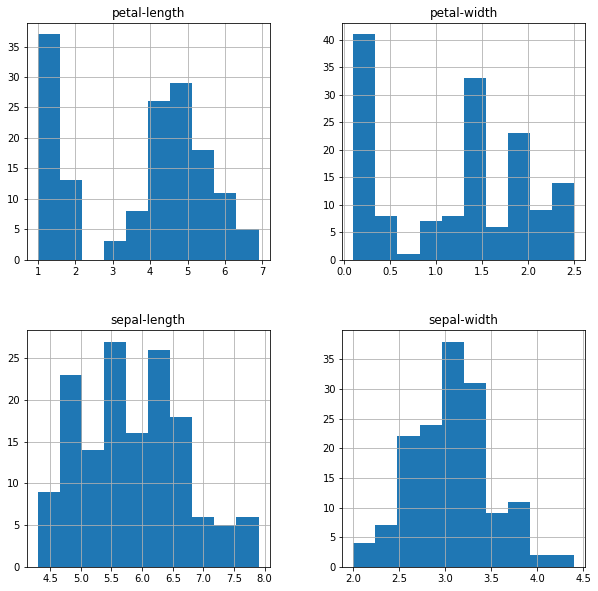

In [183]:
#histograms
dataset.hist(figsize = (10,10))
plt.show()

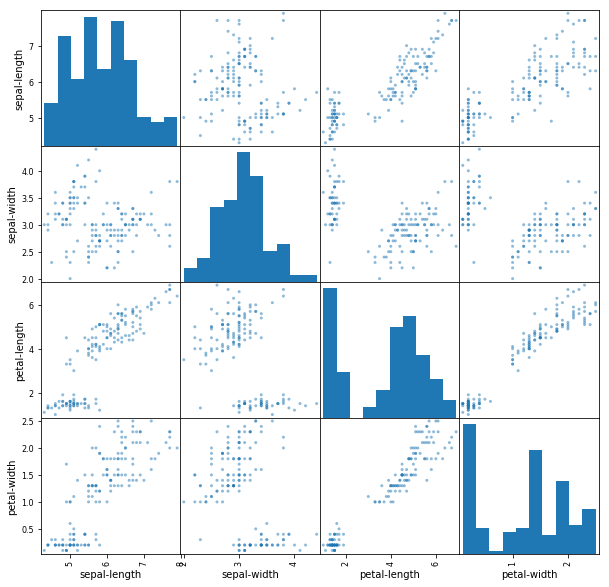

In [184]:
#multivariat plots
#scatter matrix
scatter_matrix(dataset, figsize=(10,10))
plt.show()

# Preparing our data

In [185]:
#Splitting the data into a training set (80%) and a validation set (20%) 
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.25
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

In [186]:
seed = 7 
scoring = 'accuracy'

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

# Implementing our chosen machine learning algorithms
### We will run and evaluate the following algorithms:
- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

In [187]:
#Implement various algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Evaluate each model using 10-fold cross-validation
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.954545 (0.060984)
LDA: 0.972727 (0.041660)
KNN: 0.981818 (0.036364)
CART: 0.972727 (0.041660)
NB: 0.972727 (0.041660)
SVM: 0.990909 (0.027273)


C:\Users\Casey\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


## Algorithm comparison

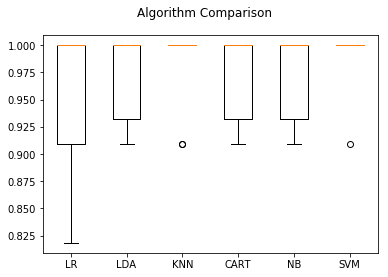

In [188]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The most accurate algorithm was the SVM, Support Vector Machine.
Now let's test it on our validation data to get a better idea of it's true accuracy.

In [189]:
svm = SVC()
#We are training our SVM using the fit() function on our training data
svm.fit(X_train, Y_train)
#Now that the model has been trained, we can use it to make predictions
predictions = svm.predict(X_validation)

print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print('Accuracy score: ', end = " ")
print(accuracy_score(Y_validation, predictions))

[[11  0  0]
 [ 0 12  2]
 [ 0  0 13]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       1.00      0.86      0.92        14
  virginica       0.87      1.00      0.93        13

avg / total       0.95      0.95      0.95        38

Accuracy score:  0.947368421053


We have run the SVM algorithm against our validation data and it has managed to predict the species of iris flower with 94.7% accuracy. Not bad!